<a href="https://colab.research.google.com/github/leonnmarcoo/CCADMACL_COM232_PROJECT/blob/main/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Training**

## **Import**

In [181]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch

## **Load the Dataset**

In [182]:
df = pd.read_csv("standardized_data.csv")

## **Understanding Data**

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4765 entries, 0 to 4764
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        4765 non-null   float64
 1   homepage      4765 non-null   int64  
 2   popularity    4765 non-null   float64
 3   revenue       4765 non-null   float64
 4   runtime       4765 non-null   float64
 5   vote_average  4765 non-null   float64
 6   vote_count    4765 non-null   float64
 7   Age_of_Movie  4765 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 297.9 KB


In [184]:
df.head()

,budget,homepage,popularity,revenue,runtime,vote_average,vote_count,Age_of_Movie
0,0.886824,1,2.165203,1.162269,2.655736,0.949993,9.375940,17.0
1,0.920587,1,2.097304,1.031082,2.997545,0.687747,8.412055,19.0
2,0.891579,1,1.873750,1.020331,1.972119,0.163255,8.404472,11.0
3,0.894472,1,1.912551,1.046023,2.802226,1.299654,9.116799,14.0
4,0.900090,1,1.106634,0.880998,1.190842,-0.011576,7.661527,14.0


## **Perform PCA**

In [185]:
pca = PCA(n_components=2)
df = pca.fit_transform(df)

In [186]:
explained_variance = pca.explained_variance_ratio_

PC1_explainedVariance = explained_variance[0]
print("Explained variance of PC1 = ", PC1_explainedVariance)

PC2_explainedVariance = explained_variance[1]
print("Explained variance of PC2 = ", PC2_explainedVariance)

Explained variance of PC1 =  0.9472675226281998
Explained variance of PC2 =  0.03516625037102226


In [187]:
print("Total explained variance: ", explained_variance.sum())

Total explained variance:  0.9824337729992221


Text(0, 0.5, 'Exaplained Variance')

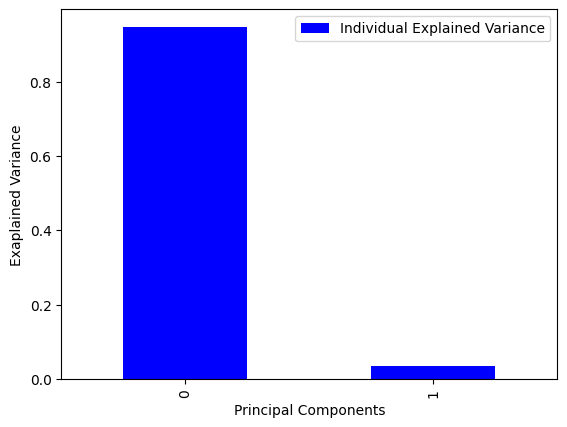

In [188]:
pd.DataFrame(explained_variance).plot.bar(color = 'blue')
plt.legend(['Individual Explained Variance'])
plt.xlabel("Principal Components")
plt.ylabel("Exaplained Variance")

## **Visualize the Data**

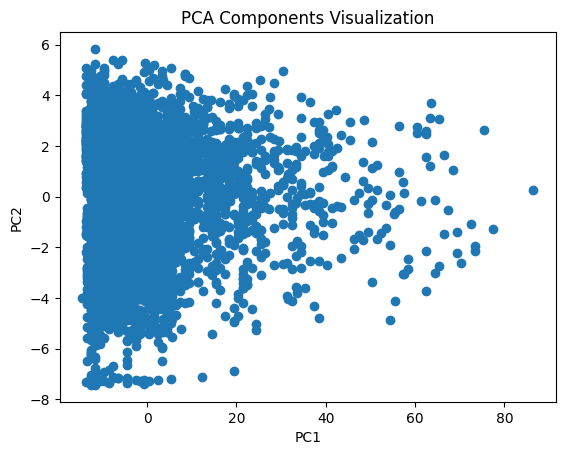

In [189]:
plt.scatter(df[:, 0], df[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Components Visualization')
plt.show()

## **Model Training**

### **K-Means**

For cluster = 1, SSE/WCSS is 764475.685121177
For cluster = 2, SSE/WCSS is 304703.1809002483
For cluster = 3, SSE/WCSS is 173734.68965440584
For cluster = 4, SSE/WCSS is 106390.94713273944
For cluster = 5, SSE/WCSS is 82336.44379699444
For cluster = 6, SSE/WCSS is 62692.11184524849
For cluster = 7, SSE/WCSS is 53295.10263578264
For cluster = 8, SSE/WCSS is 45477.40062529452
For cluster = 9, SSE/WCSS is 40408.812382937016
For cluster = 10, SSE/WCSS is 36171.32703670134


Text(0, 0.5, 'WCSS')

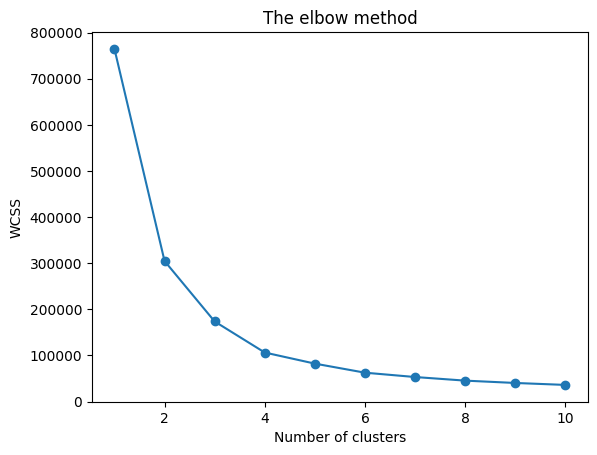

In [190]:
wcss=[]
sse={}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                    n_init = 10, random_state = 0)
    kmeans.fit(df) # Changed new_df to df
    wcss.append(kmeans.inertia_)
    sse[i] = kmeans.inertia_
    print("For cluster = {}, SSE/WCSS is {}".format(i, sse[i]))

plt.plot(range(1, 11), wcss, marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [191]:
cluster_Kmeans = KMeans(n_clusters=5, random_state=0, n_init=10)
model_kmeans = cluster_Kmeans.fit(df)
pred_kmeans = model_kmeans.labels_
print(pred_kmeans)

unique, counts = np.unique(pred_kmeans, return_counts=True)
print(dict(zip(unique, counts)))

# Create a DataFrame from the PCA-transformed data (df is a numpy array) and add the cluster labels
df_with_clusters = pd.DataFrame(data=df, columns=['PC1', 'PC2'])
df_with_clusters['cluster'] = pred_kmeans
df_with_clusters.head(10)

[0 3 0 ... 0 0 3]
{np.int32(0): np.int64(1422), np.int32(1): np.int64(1156), np.int32(2): np.int64(385), np.int32(3): np.int64(1689), np.int32(4): np.int64(113)}


,PC1,PC2,cluster
0,-6.604876,5.234532,0
1,-4.593940,4.445385,3
2,-12.611193,4.024988,0
3,-9.591799,4.983521,0
4,-9.611947,2.974497,0
5,-4.623547,3.786136,3
6,-7.620843,3.406686,0
7,-12.607776,4.582459,0
8,-6.596419,4.411252,3
9,-13.624806,4.396512,0


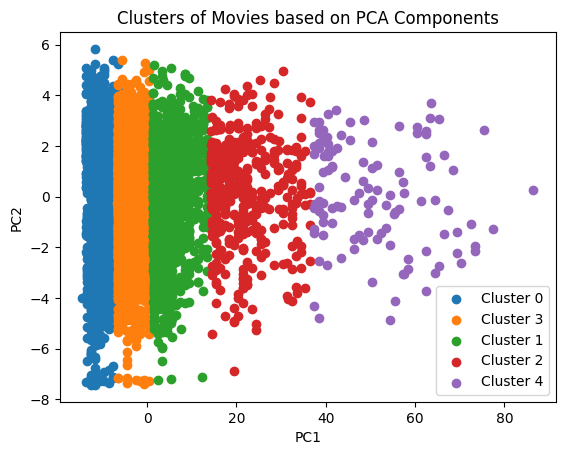

In [192]:
unique_clusters = df_with_clusters['cluster'].unique()

for cluster_label in unique_clusters:
    cluster_data = df_with_clusters[df_with_clusters['cluster'] == cluster_label]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_label}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters of Movies based on PCA Components')
plt.legend()
plt.show()

### **Hierarchical**

Text(0, 0.5, 'Euclidean distance in the space with other variables')

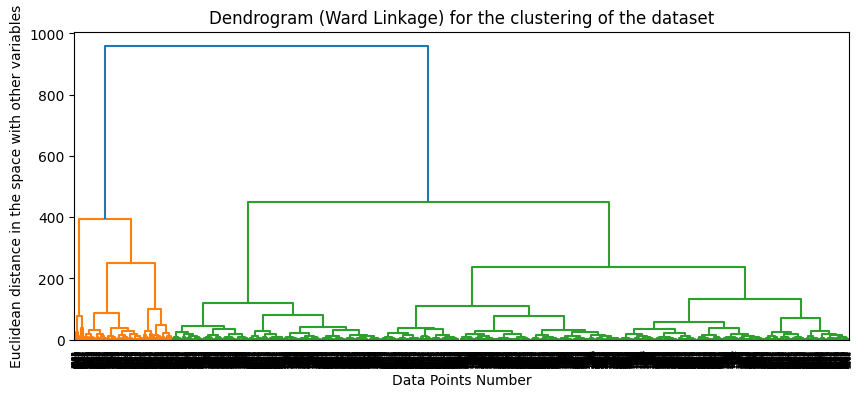

In [193]:
Z = sch.linkage(df, method = 'ward')
plt.figure(figsize=(10,4))
den = sch.dendrogram(Z)
plt.title('Dendrogram (Ward Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

In [194]:
cluster_H = AgglomerativeClustering(n_clusters=3,linkage= 'ward')

model_clt = cluster_H.fit(df) # Changed three_df to df
print(model_clt)
print('\n')

# Create a DataFrame to add cluster labels
df_hierarchical_clusters = pd.DataFrame(data=df, columns=['PC1', 'PC2'])
df_hierarchical_clusters['clusters'] = model_clt.labels_
print('Clusters assigned to each datapoints, cluster = 3 :')
print(df_hierarchical_clusters['clusters'])

AgglomerativeClustering(n_clusters=3)


Clusters assigned to each datapoints, cluster = 3 :
0       1
1       1
2       1
3       1
4       1
       ..
4760    2
4761    1
4762    1
4763    1
4764    1
Name: clusters, Length: 4765, dtype: int64


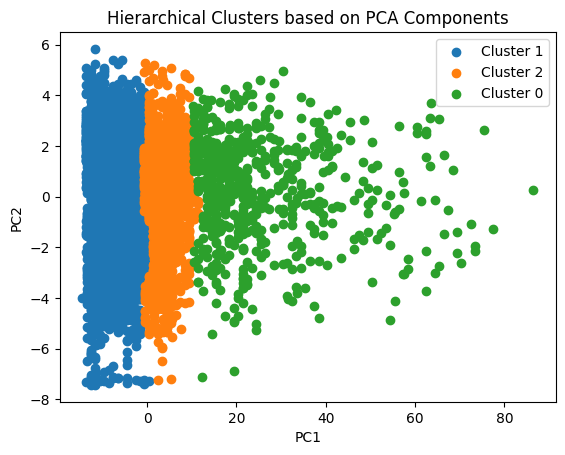

In [195]:
unique_clusters = df_hierarchical_clusters['clusters'].unique()

for cluster_label in unique_clusters:
    cluster_data = df_hierarchical_clusters[df_hierarchical_clusters['clusters'] == cluster_label]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_label}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Hierarchical Clusters based on PCA Components')
plt.legend()
plt.show()

### **DBSCAN**

In [195]:
nn = NearestNeighbors(n_neighbors=4).fit(selected_df)
distances, indices = nn.kneighbors(selected_df)

In [ ]:

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10, 8))
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance')
plt.title('Elbow Method')
plt.show

In [ ]:
min_samples = range(3, 8)
min_samples
epsilon = np.arange(0.25, 0.8, 0.05)
epsilon

In [ ]:

output = []

for ms in min_samples:
  for ep in epsilon:
    labels = DBSCAN(min_samples=ms, eps=ep).fit(selected_df).labels_
    score = metrics.silhouette_score(selected_df, labels)
    output.append((ms, ep, score))

In [ ]:
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

In [ ]:
ep = eps
dbscan = DBSCAN(eps = ep, min_samples=min_samples).fit(selected_df)
labels = dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

n_noise_ = list(labels).count(-1)

silhouette_score = metrics.silhouette_score(selected_df, labels)

In [ ]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette scrore", silhouette_score)

### **GMM**

In [195]:
X = df[['eruptions', 'waiting']]
gmm = GaussianMixture (
    n_components = 2,
    covariance_type = "full",
    random_state = 42
)
gmm.fit(X)

In [ ]:
plt.scatter(df['eruptions'], df['waiting'], c=labels_gmm, cmap='viridis', s=20)
plt.scatter(
    gmm.means_[:, 0],
    gmm.means_[:, 1],
    c="red",
    marker='x',
    s=100
)

plt.title("GMM Clustering Results")
plt.xlabel('Eruption Duration (minutes)')
plt.ylabel('Waiting Time to Next Eruption (minutes)')
plt.grid(True)
plt.show()